In [5]:
!pip install tensorflow-gpu

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [8]:
!pip install google-colab
import google.colab.drive
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
dataset=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#divide the dataset into independent and dependent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [13]:
#Feature Engineering
geography= pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [14]:
## Concatenate these variables with dataframe
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [15]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [16]:
pd.concat([X,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [17]:
#splitting into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=0)


In [18]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)

In [19]:
X_train

array([[-0.73550706,  0.01526571,  0.00886037, ..., -1.55362351,
        -1.03446007, -1.64080994],
       [ 1.02442719, -0.65260917,  0.00886037, ...,  0.64365658,
        -1.03446007, -0.07927152],
       [ 0.80829492, -0.46178778,  1.39329338, ...,  0.64365658,
         0.96668786, -0.99684012],
       ...,
       [ 0.90092304, -0.36637708,  0.00886037, ...,  0.64365658,
        -1.03446007,  1.4133552 ],
       [-0.62229491, -0.08014499,  1.39329338, ...,  0.64365658,
         0.96668786,  0.84496184],
       [-0.28265848,  0.87396199, -1.37557264, ...,  0.64365658,
        -1.03446007,  0.32500428]])

In [20]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9394,597,35,8,131101.04,1,1,1,192852.67
898,523,40,2,102967.41,1,1,0,128702.10
2398,706,42,8,95386.82,1,1,1,75732.25
5906,788,32,4,112079.58,1,0,0,89368.59
2343,706,38,5,163034.82,2,1,1,135662.17
...,...,...,...,...,...,...,...,...
8764,773,51,8,116197.65,2,1,1,86701.40
4359,545,44,2,127536.44,1,1,0,108398.63
2041,840,39,1,94968.97,1,1,0,84487.62
1108,679,38,7,110555.37,2,1,0,46522.68


In [21]:
X_train.shape

(7500, 8)

**ANN**

In [22]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.8 MB/s eta 0:00:00


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU, Dropout

In [24]:
## initialise the ann
classifier= Sequential()

In [25]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [26]:
#adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [27]:
## adding the seconds hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [28]:
## output layer
classifier.add(Dense(1,activation='sigmoid'))

In [29]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [30]:
classifier.compile(optimizer=opt ,loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
## Early Stopping
import tensorflow as tf
early_block=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [32]:
model_history= classifier.fit(X_train,y_train, validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_block)

Epoch 1/1000
503/503 [==============================] - 4s 4ms/step - loss: 0.4498 - accuracy: 0.8016 - val_loss: 0.4227 - val_accuracy: 0.8053
Epoch 2/1000
503/503 [==============================] - 3s 5ms/step - loss: 0.3828 - accuracy: 0.8414 - val_loss: 0.4088 - val_accuracy: 0.8191
Epoch 3/1000
503/503 [==============================] - 2s 4ms/step - loss: 0.3677 - accuracy: 0.8509 - val_loss: 0.3891 - val_accuracy: 0.8389
Epoch 4/1000
503/503 [==============================] - 4s 7ms/step - loss: 0.3624 - accuracy: 0.8535 - val_loss: 0.3979 - val_accuracy: 0.8308
Epoch 5/1000
503/503 [==============================] - 4s 8ms/step - loss: 0.3612 - accuracy: 0.8537 - val_loss: 0.3814 - val_accuracy: 0.8368
Epoch 6/1000
503/503 [==============================] - 6s 12ms/step - loss: 0.3588 - accuracy: 0.8565 - val_loss: 0.3797 - val_accuracy: 0.8469
Epoch 7/1000
503/503 [==============================] - 4s 9ms/step - loss: 0.3566 - accuracy: 0.8541 - val_loss: 0.3886 - val_accuracy

In [33]:
len(model_history.history['loss'])

46

In [34]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

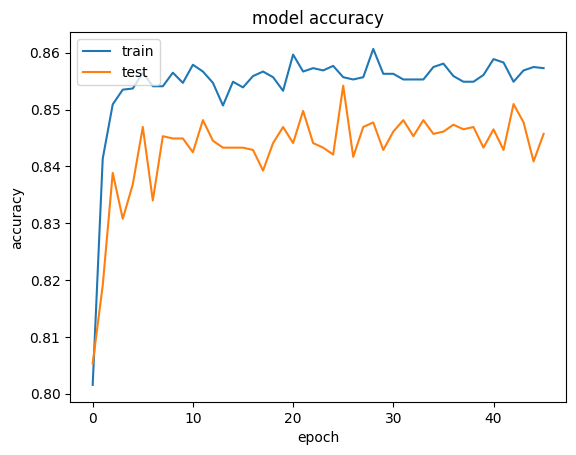

In [35]:
# summarize hostory for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

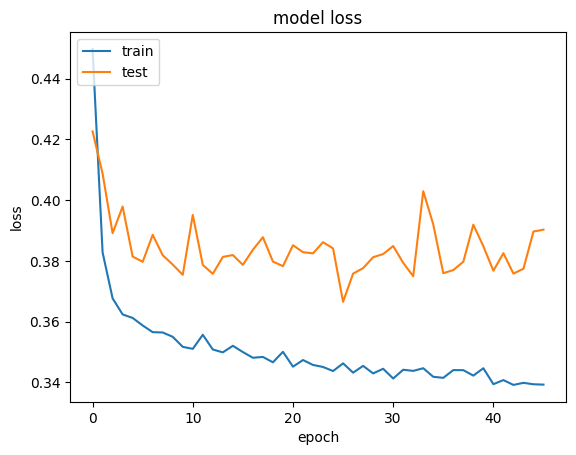

In [36]:
# summarize hostory for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [42]:
acc = classifier.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

79/79 [==============================] - 1s 6ms/step - loss: 9043.5078 - accuracy: 0.7964
Accuracy of model is 0.7964000105857849


In [37]:
#prediction
y_pred=classifier.predict(X_test)
y_pred=(y_pred >= 0.5)

79/79 [==============================] - 2s 13ms/step


In [38]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[1991,    0],
       [ 509,    0]])

In [39]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [40]:
score

0.7964

In [41]:
## get the weights
classifier.get_weights   ##we can store it in pickle file

<bound method Model.get_weights of <keras.engine.sequential.Sequential object at 0x7a6bc0f6db70>>